In [6]:
# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import imutils
import argparse
import cv2

Using TensorFlow backend.


In [ ]:
import matplotlib.pyplot as plt

In [7]:
args = {}
args['cascade'] = 'haarcascade_frontalface_default.xml'
args['model'] = 'model2.h5'
args['video'] = 'WIN_20220417_18_37_30_Pro.mp4'

In [8]:
# load the face detector cascade and smile detector CNN
detector = cv2.CascadeClassifier(args['cascade'])

In [11]:
model = keras.models.load_model('model2.h5')

In [5]:
# help(model)

In [12]:
# # if a video path was not supplied, grab the refrences to the webcam
# if not args.get('video', False):
#     print('[INFO] starting video capture...')
#     camera = cv2.VideoCapture(0)

# # otherwise, load the video
# else:

#     camera = cv2.VideoCapture(args['video'])

In [14]:
# (grabbed, frame) = camera.read()

In [171]:
frame = cv2.imread('mai_smile.jpg')

In [172]:
np.shape(frame)

(720, 1280, 3)

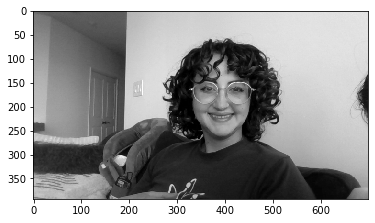

In [195]:
plt.imshow(frame[:,:,1], cmap='gray', vmin =0, vmax=255, interpolation='none')

In [174]:
# resize the fram, convert it to grayscale, and then clone the
# orgignal frame so we draw on it later in the program
frame = imutils.resize(frame, width=700)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frameClone = frame.copy()

# detect faces in the input frame, then clone the frame so that we can draw onit
rects = detector.detectMultiScale(gray,
                                  scaleFactor=1.1,
                                  minNeighbors=5,
                                  minSize=(30, 30),
                                  flags=cv2.CASCADE_SCALE_IMAGE)

In [175]:
rects

array([[324, 110, 146, 146]])

In [177]:
(fX, fY, fW, fH) = rects[0]
print(fX, fY, fW, fH)

324 110 146 146


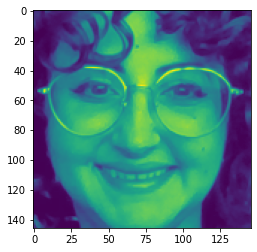

In [178]:
# Extract the face using the rects value
roi = gray[fY:fY + fH, fX:fX + fW]  # 74:74+170, 289:289+170

plt.imshow(roi)

In [179]:
roi

array([[26, 33, 34, ..., 26, 29, 27],
       [27, 35, 37, ..., 31, 29, 30],
       [30, 38, 40, ..., 29, 33, 32],
       ...,
       [35, 60, 98, ..., 28, 30, 29],
       [34, 36, 88, ..., 33, 32, 30],
       [31, 30, 47, ..., 32, 30, 29]], dtype=uint8)

In [180]:
# Resize to 28x28 pixels to use in the model.
roi = cv2.resize(roi, (28, 28))
np.shape(roi)

(28, 28)

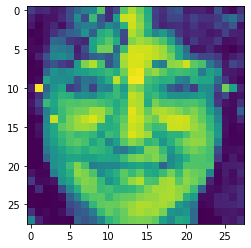

In [181]:
plt.imshow(roi)

In [182]:
np.max(roi.flatten())

211

In [183]:
np.min(roi.flatten())

0

In [184]:
# Normalize the colors from 0 to 1.
roi = roi.astype('float') / 255.0

In [185]:
roi[0]

array([0.15686275, 0.09019608, 0.09803922, 0.05490196, 0.07843137,
       0.19215686, 0.2745098 , 0.35294118, 0.38039216, 0.60392157,
       0.09803922, 0.2       , 0.61960784, 0.72156863, 0.64313725,
       0.51372549, 0.16470588, 0.11372549, 0.18823529, 0.22745098,
       0.06666667, 0.0745098 , 0.07843137, 0.04705882, 0.20392157,
       0.05098039, 0.01960784, 0.11372549])

In [186]:
print(np.max(roi.flatten()), np.min(roi.flatten()))

0.8274509803921568 0.0


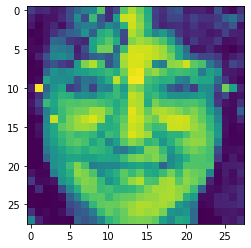

In [187]:
plt.imshow(roi)

In [188]:
# Change to array.
roi = img_to_array(roi)
np.shape(roi)

(28, 28, 1)

In [189]:
roi[0]

array([[0.15686275],
       [0.09019608],
       [0.09803922],
       [0.05490196],
       [0.07843138],
       [0.19215687],
       [0.27450982],
       [0.3529412 ],
       [0.38039216],
       [0.6039216 ],
       [0.09803922],
       [0.2       ],
       [0.61960787],
       [0.72156864],
       [0.6431373 ],
       [0.5137255 ],
       [0.16470589],
       [0.11372549],
       [0.1882353 ],
       [0.22745098],
       [0.06666667],
       [0.07450981],
       [0.07843138],
       [0.04705882],
       [0.20392157],
       [0.05098039],
       [0.01960784],
       [0.11372549]], dtype=float32)

In [190]:
np.shape(roi)

(28, 28, 1)

In [191]:
# Expand the dimensions (prepend a dimension)
roi = np.expand_dims(roi, axis=0)

In [192]:
# determine the probaboilities of both 'smiling' and 'not smiling',
# then set the label accordingly
(notSmiling, Smiling) = model.predict(roi)[0]
label = 'Smiling' if Smiling > notSmiling else "Not Smiling"

In [193]:
label

'Smiling'

In [194]:
np.shape(roi)

(1, 28, 28, 1)